In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_dir = os.path.join(project_root, 'data', 'cleaned')
final_df_path = os.path.join(data_dir, 'final_df.csv')
df = pd.read_csv(final_df_path)

In [3]:
df

,ROUTE,CARRIER,ROUTE_NAME_CITY,ONE_WAY_DISTANCE_MILES,AVG_OCCUPANCY_RATE,AVG_DEP_DELAY_MINUTES,AVG_ARR_DELAY_MINUTES,TOTAL_FLIGHTS,CARRIER_FROM_TICKETS,TOTAL_PASSENGERS,AVG_ROUNDTRIP_FARE_PER_PASSENGER,AIRPORT_CODE_A,AIRPORT_CODE_B,AIRPORT_A_SIZE,AIRPORT_A_NAME,AIRPORT_A_ELEVATION_FT,AIRPORT_A_CITY,AIRPORT_A_COORDINATES,AIRPORT_B_SIZE,AIRPORT_B_NAME,AIRPORT_B_ELEVATION_FT,AIRPORT_B_CITY,AIRPORT_B_COORDINATES,ESTIMATED_PASSENGERS,TICKET_REVENUE,BAGGAGE_REVENUE,TOTAL_REVENUE,ROUND_TRIP_DISTANCE_MILES,MILEAGE_COST,AIRPORT_FEES,DELAY_COST,TOTAL_COST,PROFIT
0,ABE-ATL,9E,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.652621,0.515817,-1.425862,263,9E,44.0,587.522727,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",34327.842297,20168387.53,1201474.48,21369862.01,1384.0,3341446.56,3945000,0.0,7286446.56,14083415.45
1,ABE-ATL,DL,"Allentown/Bethlehem/Easton, PA -> Atlanta, GA",692.0,0.656911,-1.871067,-7.512380,171,DL,29.0,470.758621,ABE,ATL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,776.0,Atlanta,"-84.428101, 33.6367",22466.358960,10576232.16,786322.56,11362554.72,1384.0,2172575.52,2565000,0.0,4737575.52,6624979.20
2,ABE-CLT,OH,"Allentown/Bethlehem/Easton, PA -> Charlotte, NC",481.0,0.661096,-1.507968,-2.513944,502,OH,32.0,494.062500,ABE,CLT,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Charlotte Douglas International Airport,748.0,Charlotte,"-80.94309997558594, 35.2140007019043",66374.000000,32792904.38,2323090.00,35115994.38,962.0,4433242.32,7530000,0.0,11963242.32,23152752.06
3,ABE-DTW,OO,"Allentown/Bethlehem/Easton, PA -> Detroit, MI",425.0,0.645200,-0.166188,-5.120053,495,OO,21.0,385.809524,ABE,DTW,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Detroit Metropolitan Wayne County Airport,645.0,Detroit,"-83.35340118408203, 42.212398529052734",63874.781899,24643499.19,2235617.37,26879116.55,850.0,3862485.00,7425000,0.0,11287485.00,15591631.55
4,ABE-FLL,G4,"Allentown/Bethlehem/Easton, PA -> Fort Lauderd...",1041.0,0.605250,-0.500000,-1.175000,40,G4,38.0,158.263158,ABE,FLL,medium_airport,Lehigh Valley International Airport,393.0,Allentown,"-75.44080352783203, 40.652099609375",large_airport,Fort Lauderdale Hollywood International Airport,30.0,Fort Lauderdale,"-80.152702, 26.072599",4842.000000,766310.21,169470.00,935780.21,2082.0,764510.40,600000,0.0,1364510.40,-428730.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,STL-TPA,WN,"St. Louis, MO -> Tampa, FL",869.0,0.658384,2.898325,0.100162,421,WN,192.0,404.515625,STL,TPA,large_airport,St Louis Lambert International Airport,618.0,St Louis,"-90.370003, 38.748697",large_airport,Tampa International Airport,30.0,Tampa,"-82.533203125, 27.975500106811523",55435.955087,22424710.02,1940258.43,24364968.45,1738.0,6716987.64,8420000,0.0,15136987.64,9227980.81
5490,STL-TUL,WN,"St. Louis, MO -> Tulsa, OK",351.0,0.646288,1.410532,-2.346538,325,WN,36.0,364.055556,STL,TUL,large_airport,St Louis Lambert International Airport,618.0,St Louis,"-90.370003, 38.748697",large_airport,Tulsa International Airport,677.0,Tulsa,"-95.88809967041016, 36.19839859008789",42008.730023,15293511.55,1470305.55,16763817.10,702.0,2094417.00,6500000,0.0,8594417.00,8169400.10
5491,SYR-TPA,F9,"Syracuse, NY -> Tampa, FL",1104.0,0.615556,1.347222,-5.263889,72,F9,20.0,134.850000,SYR,TPA,large_airport,Syracuse Hancock International Airport,421.0,Syracuse,"-76.1063003540039, 43.11119842529297",large_airport,Tampa International Airport,30.0,Tampa,"-82.533203125, 27.975500106811523",8864.000000,1195310.40,310240

### Question 1

In [4]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tabulate import tabulate
# Step 1: Filter only medium-large or large-medium routes
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
].copy()

# Step 2: Sort by TOTAL_FLIGHTS to get busiest round trips
top_10_busiest_routes = (
    filtered_df.sort_values(by='TOTAL_FLIGHTS', ascending=False)
               .head(10)[['ROUTE_NAME_CITY', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B', 'TOTAL_FLIGHTS']]
               .reset_index(drop=True)
)

# Assuming top_10_busiest_routes is already defined
print(tabulate(top_10_busiest_routes, headers='keys', tablefmt='pretty', showindex=True))

+---+-------------------------------------------+----------------+----------------+---------------+
|   |              ROUTE_NAME_CITY              | AIRPORT_CODE_A | AIRPORT_CODE_B | TOTAL_FLIGHTS |
+---+-------------------------------------------+----------------+----------------+---------------+
| 0 |        Honolulu, HI -> Kahului, HI        |      HNL       |      OGG       |     4794      |
| 1 |         Honolulu, HI -> Lihue, HI         |      HNL       |      LIH       |     3138      |
| 2 |         Honolulu, HI -> Kona, HI          |      HNL       |      KOA       |     3018      |
| 3 |         Hilo, HI -> Honolulu, HI          |      HNL       |      ITO       |     2339      |
| 4 |        Burbank, CA -> Oakland, CA         |      BUR       |      OAK       |     1885      |
| 5 |        Burbank, CA -> San Jose, CA        |      BUR       |      SJC       |     1618      |
| 6 |       Burbank, CA -> Las Vegas, NV        |      BUR       |      LAS       |     1498      |


/var/folders/17/gws30jys63j9xx5l0mwr5r4r0000gq/T/ipykernel_49041/3242145594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


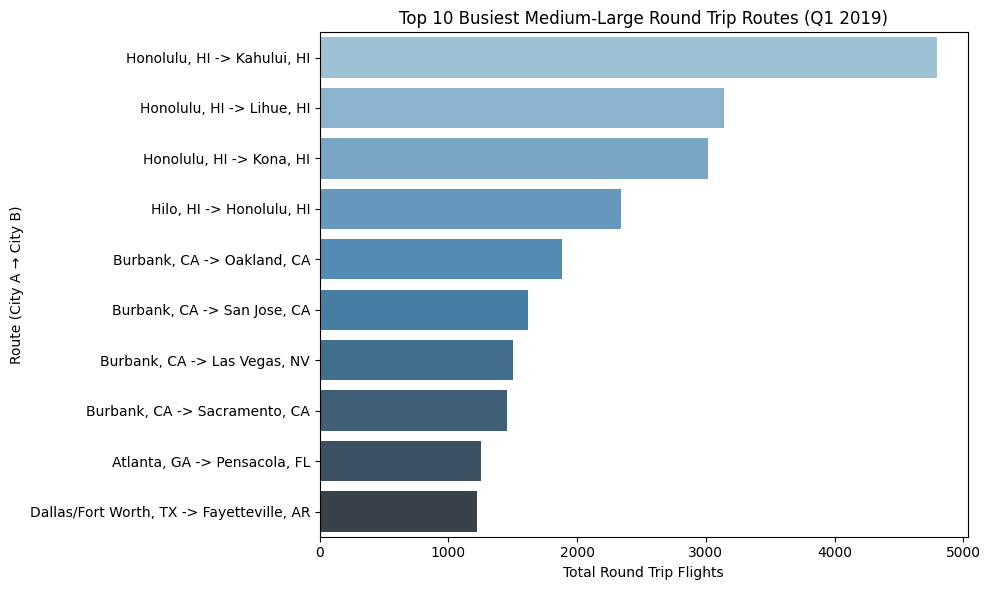

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='TOTAL_FLIGHTS',
    y='ROUTE_NAME_CITY',
    data=top_10_busiest_routes,
    palette='Blues_d'
)

plt.title('Top 10 Busiest Medium-Large Round Trip Routes (Q1 2019)')
plt.xlabel('Total Round Trip Flights')
plt.ylabel('Route (City A → City B)')
plt.tight_layout()
plt.show()


#### Question 2

In [7]:
# Step 1: Filter for medium-large or large-medium round trip routes
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
].copy()


# Step 3: Select relevant columns
columns_to_show = [
    'ROUTE_NAME_CITY',
    'AIRPORT_CODE_A', 'AIRPORT_CODE_B',
    'TOTAL_FLIGHTS',
    'TOTAL_REVENUE', 'TOTAL_COST', 'PROFIT',
    'TICKET_REVENUE', 'BAGGAGE_REVENUE',
    'MILEAGE_COST', 'AIRPORT_FEES', 'DELAY_COST'
]

# Step 4: Sort by profit and show top 10
top_10_profitable = (
    filtered_df[columns_to_show]
    .sort_values(by='PROFIT', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

top_10_profitable

,ROUTE_NAME_CITY,AIRPORT_CODE_A,AIRPORT_CODE_B,TOTAL_FLIGHTS,TOTAL_REVENUE,TOTAL_COST,PROFIT,TICKET_REVENUE,BAGGAGE_REVENUE,MILEAGE_COST,AIRPORT_FEES,DELAY_COST
0,"Honolulu, HI -> Kahului, HI",HNL,OGG,4794,1.926537e+08,80711784.00,1.119420e+08,1.709205e+08,21733232.95,8801784.00,71910000,0.0
1,"Charlotte, NC -> Wilmington, NC",CLT,ILM,1052,9.338365e+07,19353223.20,7.403043e+07,8.856296e+07,4820690.00,3573223.20,15780000,0.0
2,"Charlotte, NC -> Myrtle Beach, SC",CLT,MYR,1202,8.993164e+07,21494789.04,6.843685e+07,8.450628e+07,5425350.00,3464789.04,18030000,0.0
3,"Honolulu, HI -> Kona, HI",HNL,KOA,3018,1.205771e+08,54301908.24,6.627518e+07,1.068918e+08,13685280.00,9031908.24,45270000,0.0
4,"Honolulu, HI -> Lihue, HI",HNL,LIH,3138,1.167494e+08,52946595.36,6.380279e+07,1.023706e+08,14378821.66,5876595.36,47070000,0.0
5,"Dallas/Fort Worth, TX -> Fayetteville, AR",DFW,XNA,1219,8.653694e+07,24551635.20,6.198530e+07,8.093601e+07,5600931.00,6266635.20,18285000,0.0
6,"Atlanta, GA -> Pensacola, FL",ATL,PNS,1251,8.692383e+07,24989425.56,6.193440e+07,8.114897e+07,5774863.58,6224425.56,18765000,0.0
7,"Fresno, CA -> Los Angeles, CA",FAT,LAX,1208,7.977604e+07,22755385.92,5.702066e+07,7.434727e+07,5428772.17,4635385.92,18120000,0.0
8,"Dallas/Fort Worth, TX -> Killeen, TX",DFW,GRK,916,6.581872e+07,15993579.84,4.982514e+07,6.166499e+07,4153723.51,2253579.84,13740000,0.0
9,"Baton Rouge, LA -> Houston, TX",BTR,IAH,960,6.703594e+07,18859276.80,4.817667e+07,6.267697e+07,4358970.00,4459276.80,14400000,0.0


In [8]:
import plotly.graph_objects as go

# Sample DataFrame: top_10_profitable (already defined from your output)
routes = top_10_profitable['ROUTE_NAME_CITY']

fig = go.Figure()

# Add bars for each metric
fig.add_trace(go.Bar(
    x=routes,
    y=top_10_profitable['TOTAL_REVENUE'],
    name='Total Revenue',
    marker_color='rgb(158,202,225)'
))
fig.add_trace(go.Bar(
    x=routes,
    y=top_10_profitable['TOTAL_COST'],
    name='Total Cost',
    marker_color='rgb(255, 160, 122)'
))
fig.add_trace(go.Bar(
    x=routes,
    y=top_10_profitable['PROFIT'],
    name='Profit',
    marker_color='rgb(144,238,144)'
))

# Layout
fig.update_layout(
    barmode='group',
    title='Top 10 Most Profitable Routes: Revenue vs Cost vs Profit',
    xaxis_title='Route',
    yaxis_title='USD ($)',
    xaxis_tickangle=-45,
    legend_title='Metric',
    height=600,
    width=1000
)

fig.show()

#### Question 3

In [9]:
# Filter for medium-large or large-medium round trip routes only
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
].copy()

# Sort by PROFIT
top_profit_routes = (
    filtered_df[['ROUTE_NAME_CITY', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B', 'PROFIT']]
    .sort_values(by='PROFIT', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top_profit_routes
print(tabulate(top_profit_routes, headers='keys', tablefmt='pretty', showindex=True))

+---+-----------------------------------+----------------+----------------+--------------+
|   |          ROUTE_NAME_CITY          | AIRPORT_CODE_A | AIRPORT_CODE_B |    PROFIT    |
+---+-----------------------------------+----------------+----------------+--------------+
| 0 |    Honolulu, HI -> Kahului, HI    |      HNL       |      OGG       | 111941953.08 |
| 1 |  Charlotte, NC -> Wilmington, NC  |      CLT       |      ILM       |  74030428.8  |
| 2 | Charlotte, NC -> Myrtle Beach, SC |      CLT       |      MYR       | 68436845.96  |
| 3 |     Honolulu, HI -> Kona, HI      |      HNL       |      KOA       | 66275183.76  |
| 4 |     Honolulu, HI -> Lihue, HI     |      HNL       |      LIH       | 63802790.84  |
+---+-----------------------------------+----------------+----------------+--------------+


In [10]:
import plotly.express as px

top_profit_routes['PROFIT_MILLION'] = top_profit_routes['PROFIT'] / 1e6

fig = px.bar(
    top_profit_routes,
    x='PROFIT_MILLION',
    y='ROUTE_NAME_CITY',
    orientation='h',
    color='PROFIT_MILLION',
    color_continuous_scale='Viridis',
    text='PROFIT_MILLION',
    title='Top 5 Recommended Routes by Profit ($M)'
)

fig.update_layout(
    xaxis_title='Profit ($ Millions)',
    yaxis=dict(autorange='reversed'),
    height=500
)

fig.update_traces(texttemplate='%{text:.1f}M', textposition='outside')
fig.show()


Key Profit-Driven Insights:
1. Honolulu, HI → Kahului, HI tops the list with an exceptional profit of ~$112M — this is a strong recurring trend across charts and checks the box on profitability and intra-island demand.

2. CLT (Charlotte, NC) appears twice — routes to Wilmington, NC and Myrtle Beach, SC — solidifying it as a strong hub.

3. All 5 routes have consistently high profit margins, showing that their cost structures are under control and demand is monetized well.

4. 3 of 5 routes originate from Honolulu (HNL) – making it a very strong operational hub candidate (logistically viable if airline is okay basing planes in Hawaii).

In [11]:
# Filter to only medium ↔ large airport combinations
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
]

# Top 10 by estimated passengers
top_demand_routes = filtered_df.sort_values(by='ESTIMATED_PASSENGERS', ascending=False).head(5)

# Display table
top_demand_routes[['ROUTE_NAME_CITY', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B', 'ESTIMATED_PASSENGERS']]

,ROUTE_NAME_CITY,AIRPORT_CODE_A,AIRPORT_CODE_B,ESTIMATED_PASSENGERS
3437,"Honolulu, HI -> Kahului, HI",HNL,OGG,620949.512812
3432,"Honolulu, HI -> Lihue, HI",HNL,LIH,410823.475996
3423,"Honolulu, HI -> Kona, HI",HNL,KOA,391008.000000
3420,"Hilo, HI -> Honolulu, HI",HNL,ITO,302903.959599
1199,"Burbank, CA -> Oakland, CA",BUR,OAK,242825.630559


In [12]:
fig = px.bar(
    top_demand_routes,
    x='ESTIMATED_PASSENGERS',
    y='ROUTE_NAME_CITY',
    orientation='h',
    color='ESTIMATED_PASSENGERS',
    text='ESTIMATED_PASSENGERS',
    color_continuous_scale='Blues',
    title='Top 5 Routes by Estimated Passengers'
)

fig.update_layout(
    xaxis_title='Estimated Passengers',
    yaxis_title='Route',
    yaxis=dict(autorange='reversed'),
    margin=dict(r=120),  # <-- Increased right margin
    height=500
)

fig.update_traces(
    texttemplate='%{text:,.0f}',
    textposition='inside',  # <-- Shift inside to avoid cutoff
    insidetextanchor='end'  # Align text to bar end
)

fig.show()


These are the top 5 medium-large round trip routes by estimated passenger volume:

All 5 routes have high demand, especially the Honolulu to Kahului route crossing 620k passengers.

Honolulu (HNL) dominates — acting as a strong hub in all top 4.

California (BUR-OAK) makes the list, highlighting strong regional demand on the West Coast.



In [13]:
# Calculate total average delay
df['AVG_TOTAL_DELAY'] = df['AVG_DEP_DELAY_MINUTES'] + df['AVG_ARR_DELAY_MINUTES']

# Filter for only medium ↔ large routes
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
]

# Sort by lowest total delay (most punctual) and show top 5
top_punctual = filtered_df.sort_values(by='AVG_TOTAL_DELAY').head(5)

# Display selected columns
top_punctual[['ROUTE_NAME_CITY', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B', 'AVG_DEP_DELAY_MINUTES', 'AVG_ARR_DELAY_MINUTES', 'AVG_TOTAL_DELAY']]


,ROUTE_NAME_CITY,AIRPORT_CODE_A,AIRPORT_CODE_B,AVG_DEP_DELAY_MINUTES,AVG_ARR_DELAY_MINUTES,AVG_TOTAL_DELAY
2391,"Denver, CO -> Santa Barbara, CA",DEN,SBA,-5.000000,-24.000000,-29.000000
2198,"Denver, CO -> Harlingen/San Benito, TX",DEN,HRL,-6.177419,-21.983871,-28.161290
103,"Albany, NY -> Minneapolis, MN",ALB,MSP,-5.500000,-19.750000,-25.250000
775,"Bismarck/Mandan, ND -> Minneapolis, MN",BIS,MSP,-4.511905,-20.047619,-24.559524
1507,"Cleveland, OH -> St. Petersburg, FL",CLE,PIE,-9.937500,-14.562500,-24.500000


In [14]:
# Bar chart for most punctual routes
fig = px.bar(
    top_punctual,
    x='AVG_TOTAL_DELAY',
    y='ROUTE_NAME_CITY',
    orientation='h',
    color='AVG_TOTAL_DELAY',
    color_continuous_scale='blues_r',
    text='AVG_TOTAL_DELAY',
    title='Top 5 Most Punctual Routes (Lowest Average Total Delay)'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Average Total Delay (Minutes)',
    yaxis_title='Route',
    yaxis=dict(autorange='reversed'),  # Reverse to show best at top
    height=500,
    margin=dict(r=100)
)

# Format delay values on bars
fig.update_traces(
    texttemplate='%{text:.1f} min',
    textposition='inside'
)

fig.show()


Insights:

All these routes have negative average delay, which means they tend to arrive early — a huge win for your brand.

Denver, CO is dominating — it shows up twice, including the most punctual route to Santa Barbara, CA (-29 mins total delay).

Every route here is well below -24 mins on average — super punctual and consistent.

These are not just "not late" — they’re early, showing robust operational buffer or under-scheduled flights.

In [15]:
# Filter for medium-large airport pairs only
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
]

# Group by route, summing total flights
route_flight_counts = (
    filtered_df.groupby(['ROUTE_NAME_CITY', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B'])
    ['TOTAL_FLIGHTS']
    .sum()
    .reset_index()
    .sort_values(by='TOTAL_FLIGHTS', ascending=False)
    .head(5)
)

# Show top 5 busiest roundtrip routes
print(tabulate(route_flight_counts, headers='keys', tablefmt='pretty', showindex=True))

+-----+-----------------------------+----------------+----------------+---------------+
|     |       ROUTE_NAME_CITY       | AIRPORT_CODE_A | AIRPORT_CODE_B | TOTAL_FLIGHTS |
+-----+-----------------------------+----------------+----------------+---------------+
| 542 | Honolulu, HI -> Kahului, HI |      HNL       |      OGG       |     4794      |
| 544 |  Honolulu, HI -> Lihue, HI  |      HNL       |      LIH       |     3138      |
| 543 |  Honolulu, HI -> Kona, HI   |      HNL       |      KOA       |     3018      |
| 539 |  Hilo, HI -> Honolulu, HI   |      HNL       |      ITO       |     2339      |
| 194 | Burbank, CA -> San Jose, CA |      BUR       |      SJC       |     2127      |
+-----+-----------------------------+----------------+----------------+---------------+


In [16]:
# Horizontal bar chart for busiest routes
fig = px.bar(
    route_flight_counts,
    x='TOTAL_FLIGHTS',
    y='ROUTE_NAME_CITY',
    orientation='h',
    text='TOTAL_FLIGHTS',
    color='TOTAL_FLIGHTS',
    color_continuous_scale='Blues',
    title='Top 5 Busiest Roundtrip Routes by Total Flights'
)

# Reverse axis for visual order
fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title='Total Flights in Q1 2019',
    yaxis_title='Route',
    height=500
)

# Show value labels on bars
fig.update_traces(
    texttemplate='%{text}',
    textposition='inside'
)

fig.show()


Honolulu, HI → Kahului, HI (HNL–OGG) leads with 4,794 roundtrip flights — that’s incredibly high frequency.

All top 4 routes originate from Honolulu (HNL), highlighting it as a hub for inter-island travel.

These routes show proven operational history, meaning crew logistics, slots, and turnaround times are likely well-optimized.

Burbank → San Jose is the only mainland route in the top 5, suggesting California regional routes are also active.

In [17]:
# Calculate revenue-to-cost ratio
df['REV_TO_COST_RATIO'] = df['TOTAL_REVENUE'] / df['TOTAL_COST']

# Filter for only medium ↔ large airport routes
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
]

# Drop rows with zero or null TOTAL_COST to avoid divide-by-zero
filtered_df = filtered_df[filtered_df['TOTAL_COST'] > 0]

# Sort by REV_TO_COST_RATIO and show top 5
top_rev_cost_routes = filtered_df.sort_values(by='REV_TO_COST_RATIO', ascending=False).head(5)

# Display relevant info
top_rev_cost_routes[['ROUTE_NAME_CITY', 'AIRPORT_CODE_A', 'AIRPORT_CODE_B', 'TOTAL_REVENUE', 'TOTAL_COST', 'REV_TO_COST_RATIO']]


,ROUTE_NAME_CITY,AIRPORT_CODE_A,AIRPORT_CODE_B,TOTAL_REVENUE,TOTAL_COST,REV_TO_COST_RATIO
3132,"Fargo, ND -> Minneapolis, MN",FAR,MSP,6515556.0,1107468.24,5.883289
2719,"Detroit, MI -> Elmira/Corning, NY",DTW,ELM,2237820.0,421910.40,5.304017
2541,"Dallas/Fort Worth, TX -> Lawton/Fort Sill, OK",DFW,LAW,18766291.3,3637072.80,5.159724
245,"Atlanta, GA -> Evansville, IN",ATL,EVV,6617707.2,1328412.00,4.981668
2157,"Denver, CO -> Eagle, CO",DEN,EGE,37396731.0,7535001.60,4.963069


In [18]:
fig = px.bar(
    top_rev_cost_routes,
    x='REV_TO_COST_RATIO',
    y='ROUTE_NAME_CITY',
    orientation='h',
    text='REV_TO_COST_RATIO',
    title='Top 5 Routes by Revenue-to-Cost Ratio',
    color_discrete_sequence=['#EF553B']  # Custom solid red-orange color
)

fig.update_layout(
    yaxis=dict(autorange='reversed'),
    xaxis_title='Revenue to Cost Ratio',
    yaxis_title='Route',
    height=500
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='inside'
)

fig.show()


Insights:

Fargo, ND → Minneapolis, MN stands out with a massive 5.9x return on cost. That's incredibly lean and efficient — great margins.

Detroit, MI → Elmira/Corning, NY and Dallas/Fort Worth, TX → Lawton/Fort Sill, OK also push above 5x, making them low-cost, high-reward gems.

Even the last two — ATL → EVV and DEN → EGE — are clocking near 5x, which is impressive for aviation.

In [19]:
# Step 1: Calculate cost component percentages
df['MILEAGE_COST_PCT'] = df['MILEAGE_COST'] / df['TOTAL_COST']
df['AIRPORT_FEES_PCT'] = df['AIRPORT_FEES'] / df['TOTAL_COST']
df['DELAY_COST_PCT'] = df['DELAY_COST'] / df['TOTAL_COST']

# Step 2: Filter for medium-large only
filtered_df = df[
    ((df['AIRPORT_A_SIZE'] == 'medium_airport') & (df['AIRPORT_B_SIZE'] == 'large_airport')) |
    ((df['AIRPORT_A_SIZE'] == 'large_airport') & (df['AIRPORT_B_SIZE'] == 'medium_airport'))
].copy()

# Step 3: Filter for balanced routes
balanced_routes = filtered_df[
    (filtered_df['MILEAGE_COST_PCT'] <= 0.7) &
    (filtered_df['AIRPORT_FEES_PCT'] <= 0.7) &
    (filtered_df['DELAY_COST_PCT'] <= 0.7) &
    (filtered_df['DELAY_COST_PCT'] <= filtered_df['DELAY_COST_PCT'].median())
]

# Step 4: Sort by profit or total cost (your call — let’s go with profit)
top_balanced = balanced_routes.sort_values(by='PROFIT', ascending=False).head(5)

# Step 5: Display key columns
top_balanced[[
    'ROUTE_NAME_CITY', 'PROFIT', 'TOTAL_COST',
    'MILEAGE_COST_PCT', 'AIRPORT_FEES_PCT', 'DELAY_COST_PCT'
]]


,ROUTE_NAME_CITY,PROFIT,TOTAL_COST,MILEAGE_COST_PCT,AIRPORT_FEES_PCT,DELAY_COST_PCT
154,"Aspen, CO -> Chicago, IL",45187761.89,26408562.48,0.553554,0.446446,0.0
3633,"Houston, TX -> Midland/Odessa, TX",45059781.71,16265148.84,0.344304,0.655696,0.0
1129,"Baton Rouge, LA -> Dallas/Fort Worth, TX",43640224.61,20467616.52,0.319168,0.680832,0.0
3497,"West Palm Beach/Palm Beach, FL -> White Plains...",40513202.43,29367488.64,0.563803,0.436197,0.0
152,"Aspen, CO -> Los Angeles, CA",40033338.68,23852183.52,0.474262,0.525738,0.0


In [20]:
import plotly.graph_objects as go

# Prepare the figure
fig = go.Figure()

# Add stacked bars
fig.add_trace(go.Bar(
    x=top_balanced['ROUTE_NAME_CITY'],
    y=top_balanced['MILEAGE_COST_PCT'],
    name='Mileage Cost %'
))

fig.add_trace(go.Bar(
    x=top_balanced['ROUTE_NAME_CITY'],
    y=top_balanced['AIRPORT_FEES_PCT'],
    name='Airport Fees %'
))

fig.add_trace(go.Bar(
    x=top_balanced['ROUTE_NAME_CITY'],
    y=top_balanced['DELAY_COST_PCT'],
    name='Delay Cost %'
))

# Customize layout
fig.update_layout(
    barmode='stack',
    title='Cost Structure Breakdown (Top 5 Balanced Routes)',
    xaxis_title='Route',
    yaxis_title='Cost Percentage of Total Cost',
    yaxis_tickformat='.0%',
    legend_title='Cost Component',
    height=500
)

fig.show()


These routes have well-distributed cost structures — no single cost (like delay or airport fees) dominates the total expense.

All routes have zero delay cost, which is a big operational win.

Airport fees and mileage costs are both well below 70%, which means the airline isn’t overly dependent on airport negotiations or distance-driven fuel costs.

Every one of these routes is already very profitable (profits over $40M), meaning these aren’t just cost-efficient — they’re money-makers.

#### Question 4

In [21]:
# Filter for top 5 recommended routes — update the list as per your final selection
top_5_recommend = df[df['ROUTE_NAME_CITY'].isin([
    "Honolulu, HI -> Kahului, HI",
    "Charlotte, NC -> Wilmington, NC",
    "Charlotte, NC -> Myrtle Beach, SC",
    "Honolulu, HI -> Kona, HI",
    "Honolulu, HI -> Lihue, HI"
])].copy()

# Calculate profit per round trip flight
top_5_recommend['PROFIT_PER_FLIGHT'] = top_5_recommend['PROFIT'] / top_5_recommend['TOTAL_FLIGHTS']

# Set airplane cost
airplane_cost = 90_000_000

# Calculate breakeven flights needed
top_5_recommend['BREAKEVEN_FLIGHTS'] = (airplane_cost / top_5_recommend['PROFIT_PER_FLIGHT']).round()

# Select and display summary metrics
breakeven_summary = top_5_recommend[[
    'ROUTE_NAME_CITY',
    'TOTAL_FLIGHTS',
    'PROFIT',
    'PROFIT_PER_FLIGHT',
    'BREAKEVEN_FLIGHTS',
    'ESTIMATED_PASSENGERS',
    'AVG_TOTAL_DELAY'
]]

breakeven_summary.sort_values(by='BREAKEVEN_FLIGHTS')


,ROUTE_NAME_CITY,TOTAL_FLIGHTS,PROFIT,PROFIT_PER_FLIGHT,BREAKEVEN_FLIGHTS,ESTIMATED_PASSENGERS,AVG_TOTAL_DELAY
1587,"Charlotte, NC -> Wilmington, NC",413,2.909971e+07,70459.351186,1277.0,54447.341002,-8.606714
1588,"Charlotte, NC -> Wilmington, NC",1052,7.403043e+07,70371.130038,1279.0,137734.000000,-3.121673
1635,"Charlotte, NC -> Myrtle Beach, SC",1202,6.843685e+07,56935.811947,1581.0,155010.000000,-7.555740
3437,"Honolulu, HI -> Kahului, HI",4794,1.119420e+08,23350.428260,3854.0,620949.512812,-2.367031
3423,"Honolulu, HI -> Kona, HI",3018,6.627518e+07,21959.968111,4098.0,391008.000000,-3.710736
3432,"Honolulu, HI -> Lihue, HI",3138,6.380279e+07,20332.310656,4426.0,410823.475996,-2.790991


In [22]:
import plotly.express as px

# Bar chart for breakeven flights
fig = px.bar(
    breakeven_summary.sort_values(by='BREAKEVEN_FLIGHTS'),
    x='BREAKEVEN_FLIGHTS',
    y='ROUTE_NAME_CITY',
    orientation='h',
    text='BREAKEVEN_FLIGHTS',
    color='PROFIT_PER_FLIGHT',  # Optional: Color based on profitability
    color_continuous_scale='viridis',
    labels={'BREAKEVEN_FLIGHTS': 'Flights to Breakeven', 'ROUTE_NAME_CITY': 'Route'},
    title='Flights Required to Breakeven for Top 5 Recommended Routes'
)

fig.update_layout(
    xaxis_title='Number of Flights to Breakeven',
    yaxis_title='Route',
    coloraxis_colorbar=dict(title="Profit per Flight ($)"),
    font=dict(size=14),
    plot_bgcolor='white'
)

fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.show()


Insights:

Charlotte, NC → Wilmington, NC is the most capital-efficient route — only ~1,277 flights needed to recover $90M.

Other Charlotte routes (→ Myrtle Beach) also break even in ~1,581 flights.

Hawaiian routes like Honolulu → Kahului and Honolulu → Lihue require 3,800–4,400 flights to break even — still attractive given:

    1. Strong passenger demand (620k+, 410k+)

    2. Healthy profits

    3. Punctuality (delays around -2 to -3 minutes)



#### Question 5

1. Route Profit Margin (%)
Formula: (Total Profit / Total Revenue) * 100

Why: Tracks profitability over time, shows if route continues to deliver solid returns.

2. Estimated Passenger Growth Rate
Formula: % change in Estimated Passengers QoQ

Why: Helps track demand momentum and forecast future capacity needs.

3. Average Total Delay (min)
Formula: Avg Departure Delay + Avg Arrival Delay

Why: Critical for your brand ("On time, for you") — a decline signals operations are slipping.

4. Revenue-to-Cost Ratio
Formula: Total Revenue / Total Cost

Why: Measures route efficiency — are costs creeping up faster than revenue?

5. Occupancy Rate
Formula: Estimated Passengers / (Total Flights * 200)

Why: Core metric of operational efficiency — low occupancy could indicate pricing or scheduling issues.

6. Breakeven Flight Tracker
Formula: Cumulative Route Profit / Aircraft Cost

Why: Tracks how close each route is to paying off the $90M airplane investment.